In [1]:
import cobra
import GEMS
import pandas as pd
import numpy as np
import os
import re


import pickle
from etcpy import etc
from etcpy import tempDep
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score

import matplotlib.pyplot as plt

In [2]:
def aerobic(params):
    # thermalParams: a dictionary with ids like uniprotid_Topt 
    df = etc.calculate_thermal_params(params)
    #mae = pickle.load(open(os.path.join(path,'models/aerobic.pkl'),'rb'))
    mae = cobra.io.load_matlab_model('../models/ecModel.mat')
    
    match = re.compile('usage_prot_*', re.IGNORECASE)
    for react in mae.reactions:
        if match.match(react.id) and react.lower_bound != -1000:
            ori_lb = react.lower_bound
            react.lower_bound = ori_lb*2


    mae.reactions.EX_glc__D_e.lower_bound = -100
    mae.reactions.BIOMASS_Ec_iJO1366_core_53p95M.upper_bound = 50
    
    try: 
        rae, gae, oae = etc.simulate_growth(mae,dfae_batch.index+273.15,df=df,sigma=0.5)
    except: 
        rae = np.zeros(dfae_batch.shape[0])
        gae = np.zeros(dfae_batch.shape[0])
        oae = np.zeros(dfae_batch.shape[0])
            
    rae = [0 if x is None else x for x in rae]
    rae = [0 if x<1e-3 else x for x in rae]
    #print(rae)
    #rexp = GEMS.aerobic_exp_data()['data']
    
    #print('r2_batch:',r2_score(rexp,rae))
    #print('MSE_ae',MSE(rexp,rae))
    return {'growth':np.array(rae), 'glucose':np.array(gae), 'oxygen': np.array(oae)}

In [3]:
data = GEMS.load_exp_data('../data/ExpGrowth.csv')
path = '../'
params = pd.read_csv(os.path.join(path,'data/model_enzyme_params_new.csv'),index_col=0)
params = tempDep.sample_data_uncertainty_with_constraint_increasing_topt(params)
params

,Topt,Topt_std,Length,Tm,Tm_std,T90,dCpt,dCpt_std,topt_source
P77467,310.663465,10,262,328.717325,7.588735,NaN,-4029.589376,1000,predicted
P76077,314.663465,10,309,328.717325,7.588735,NaN,-3460.206290,1000,predicted
P76078,315.720197,10,95,328.717325,7.588735,NaN,-4213.748079,1000,BullShit
P76079,313.063465,10,248,328.717325,7.588735,NaN,-3768.610115,1000,predicted
P76081,315.720197,10,356,328.717325,7.588735,NaN,-4019.951850,1000,BullShit
...,...,...,...,...,...,...,...,...,...
P0AG80,316.353261,10,438,329.166303,4.070000,330.45,-2931.277995,1000,predicted
P77718,309.545150,10,482,319.125751,4.070000,320.15,-4676.068152,1000,predicted
P0A6D5,312.272521,10,288,328.762604,7.710000,NaN,-3192.675709,1000,predicted
standard,314.333781,10,272,328.762604,7.710000,NaN,-5582.650652,1000,BullShit


Set parameter Username
Academic license - for non-commercial use only - expires 2024-05-29
NGAM is: 3.23
Growth at  20.153299075508016 is:  0.1967182533850101
NGAM is: 3.23
Growth at  23.00151111308503 is:  0.32715879555594474
NGAM is: 3.666948749964016
Growth at  26.331896319367047 is:  0.5341404184489187
NGAM is: 4.228097946953468
Growth at  28.251819864188008 is:  0.6743925353062707
NGAM is: 4.675583853845237
Growth at  29.99421176442104 is:  0.8083887625244904
NGAM is: 5.047267123847456
Growth at  31.62212188446705 is:  0.9334162172919575
NGAM is: 5.44939156263788
Growth at  33.61728633658504 is:  1.0773451979941913
NGAM is: 5.950125048399887
Growth at  36.55299482796005 is:  1.2059903368686746
NGAM is: 6.237403245621997
Growth at  38.54155004207803 is:  1.1255173585472444
NGAM is: 6.449817187489966
Growth at  40.20094365636703 is:  1.0449422187186457
NGAM is: 6.681009354243395
Growth at  42.23876395989504 is:  0.9347368721355283
NGAM is: 6.9000236503978725
Growth at  44.4534910975

/home/aditi/.local/lib/python3.10/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)


Failed to solve the problem
Growth at  6.990780000000029 is:  0
NGAM is: 3.23
Growth at  7.959210000000041 is:  0.0022369879751967803
NGAM is: 3.23
Growth at  8.527750000000026 is:  0.008828842126701665
NGAM is: 3.23
Growth at  9.952300000000037 is:  0.015368899530916304
NGAM is: 3.23
Growth at  9.951150000000041 is:  0.01536343915992242
NGAM is: 3.23
Growth at  9.950860000000034 is:  0.015362062464259398
NGAM is: 3.23
Growth at  11.999600000000044 is:  0.02821311247702182
NGAM is: 3.23
Growth at  12.398600000000044 is:  0.031575331027664015
NGAM is: 3.23
Growth at  12.454800000000034 is:  0.032075240221053535
NGAM is: 3.23
Growth at  14.392200000000003 is:  0.053901572376270974
NGAM is: 3.23
Growth at  15.132200000000012 is:  0.06497844685429591
NGAM is: 3.23
Growth at  14.960900000000038 is:  0.062261579186287774
NGAM is: 3.23
Growth at  14.96040000000005 is:  0.062253787404293326
NGAM is: 3.23
Growth at  14.902700000000038 is:  0.06135996623305231
NGAM is: 3.23
Growth at  14.9592000

/home/aditi/.local/lib/python3.10/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)


Failed to solve the problem
Growth at  7.5 is:  0
NGAM is: 3.23
Growth at  7.800000000000011 is:  0.00037911709198051955
NGAM is: 3.23
Growth at  8.600000000000023 is:  0.009092583277453136
NGAM is: 3.23
Growth at  9.0 is:  0.010687494137609091
NGAM is: 3.23
Growth at  10.800000000000011 is:  0.019884540867999487
NGAM is: 3.23
Growth at  12.0 is:  0.028216323579119802
NGAM is: 3.23
Growth at  12.800000000000011 is:  0.03529563598853027
NGAM is: 3.23
Growth at  13.5 is:  0.04267062577389199
NGAM is: 3.23
Growth at  14.800000000000011 is:  0.059795102593237906
NGAM is: 3.23
Growth at  15.600000000000023 is:  0.07289406182219015
NGAM is: 3.23
Growth at  16.200000000000045 is:  0.084170778598462
NGAM is: 3.23
Growth at  17.0 is:  0.10133183683874125
NGAM is: 3.23
Growth at  17.600000000000023 is:  0.1159235073942553
NGAM is: 3.23
Growth at  17.900000000000034 is:  0.12380614114038288
NGAM is: 3.23
Growth at  18.5 is:  0.14080166333907962
NGAM is: 3.23
Growth at  19.200000000000045 is:  0.1

/home/aditi/.local/lib/python3.10/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)


Failed to solve the problem
Growth at  7.610000000000014 is:  0
NGAM is: 3.23
Growth at  10.310000000000002 is:  0.01715172781311187
NGAM is: 3.23
Growth at  12.010000000000048 is:  0.02829670267594841
NGAM is: 3.23
Growth at  13.210000000000036 is:  0.039471910073264116
NGAM is: 3.23
Growth at  14.510000000000048 is:  0.05555248301059499
NGAM is: 3.23
Growth at  16.010000000000048 is:  0.08045788107296421
NGAM is: 3.23
Growth at  17.410000000000025 is:  0.11113625042383203
NGAM is: 3.23
Growth at  18.510000000000048 is:  0.14109919149326408
NGAM is: 3.23
Growth at  20.210000000000036 is:  0.19888381589494708
NGAM is: 3.23
Growth at  21.510000000000048 is:  0.25329916202632385
NGAM is: 3.23
Growth at  22.710000000000036 is:  0.3117592137672867
NGAM is: 3.23
Growth at  24.110000000000014 is:  0.38990767811748567
NGAM is: 3.3689797194491957
Growth at  25.410000000000025 is:  0.4715325150903013
NGAM is: 3.783592869597787
Growth at  26.710000000000036 is:  0.5608138070898676
NGAM is: 4.133

/home/aditi/.local/lib/python3.10/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)


Failed to solve the problem
Growth at  7.710000000000036 is:  0
NGAM is: 3.23
Growth at  9.410000000000025 is:  0.012583291889704593
NGAM is: 3.23
Growth at  11.210000000000036 is:  0.0224533005319621
NGAM is: 3.23
Growth at  13.110000000000014 is:  0.03841676108333483
NGAM is: 3.23
Growth at  14.310000000000002 is:  0.05277377715966033
NGAM is: 3.23
Growth at  15.710000000000036 is:  0.07486449363280995
NGAM is: 3.23
Growth at  17.110000000000014 is:  0.10389290996789764
NGAM is: 3.23
Growth at  18.210000000000036 is:  0.13237863424473265
NGAM is: 3.23
Growth at  19.510000000000048 is:  0.17331606095600818
NGAM is: 3.23
Growth at  20.710000000000036 is:  0.218729705361698
NGAM is: 3.23
Growth at  22.010000000000048 is:  0.2766907061041289
NGAM is: 3.23
Growth at  23.310000000000002 is:  0.3439601368836443
NGAM is: 3.23
Growth at  24.410000000000025 is:  0.408000859411521
NGAM is: 3.435303834091968
Growth at  25.610000000000014 is:  0.48480343709518875
NGAM is: 3.8739333030540273
Growt

/tmp/ipykernel_24465/1029262403.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax1 = plt.subplots(figsize=(9, 6))


NGAM is: 6.710323628755098
Growth at  42.51752630000004 is:  0.9190246485248944
NGAM is: 6.291364664992369
Growth at  38.946225500000025 is:  1.1068411830284748
NGAM is: 5.792455872271329
Growth at  35.564389800000015 is:  1.1976906033953374
NGAM is: 5.2248506995445565
Growth at  32.4697357 is:  0.9963981591968287
NGAM is: 4.577823936494523
Growth at  29.59498880000001 is:  0.7774617460103184
NGAM is: 3.91153397894767
Growth at  27.136773900000037 is:  0.5915379678808654
NGAM is: 3.23
Growth at  24.8202268 is:  0.4334770423476322
NGAM is: 3.23
Growth at  22.23694210000002 is:  0.28776360499459214
NGAM is: 3.23
Growth at  19.89630420000003 is:  0.18711033766856222
NGAM is: 3.23
Growth at  17.20414500000004 is:  0.10612495529408575
NGAM is: 3.23
Growth at  14.750685800000042 is:  0.059055424012188856
NGAM is: 3.23
Growth at  12.104618300000027 is:  0.02906696549455824
NGAM is: 6.508443388144836
Growth at  40.69265810000002 is:  1.019275578328105
NGAM is: 6.042367344025697
Growth at  37.1

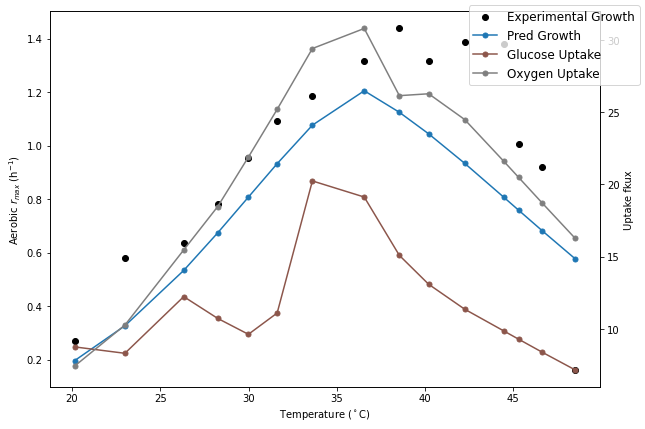

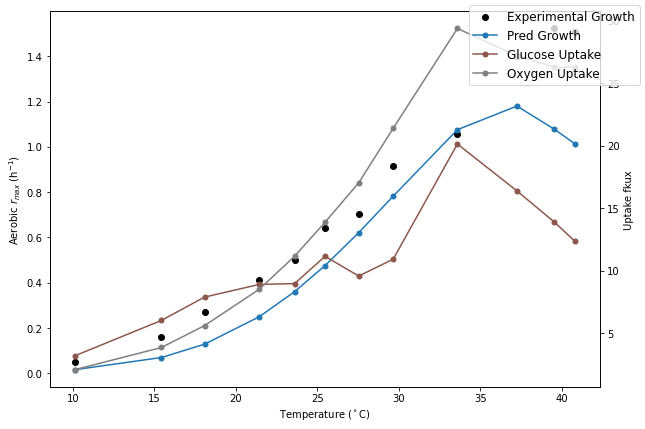

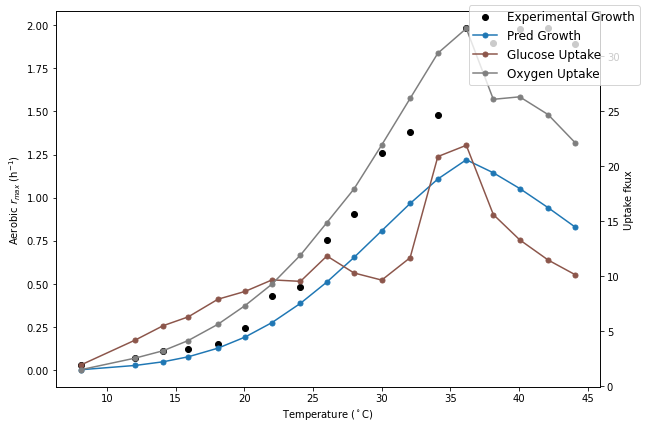

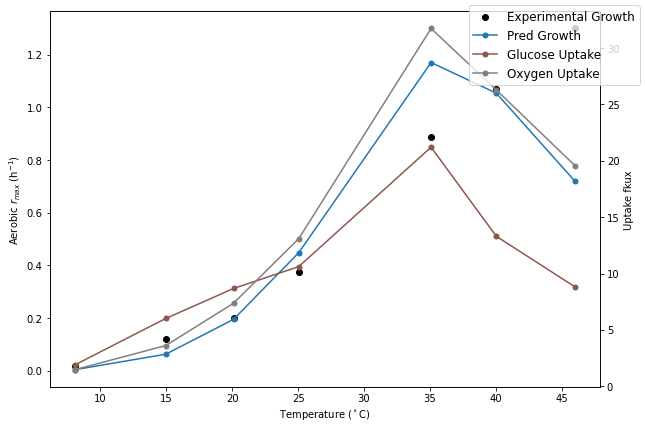

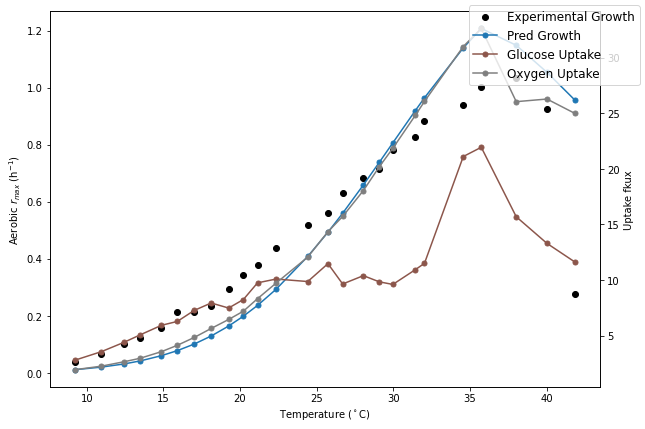

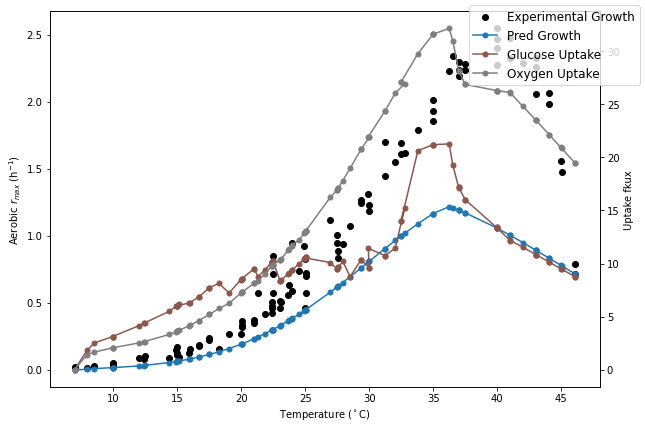

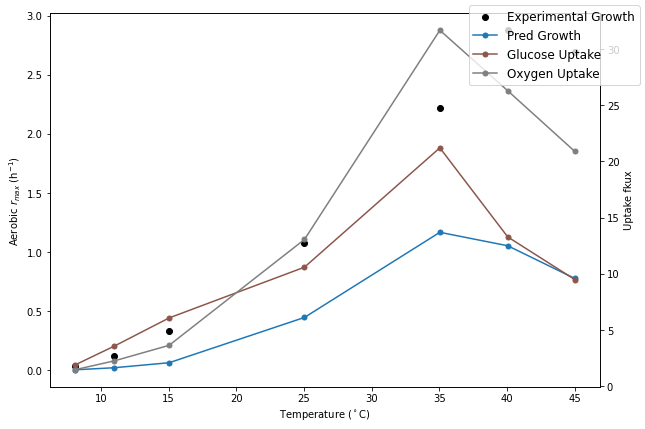

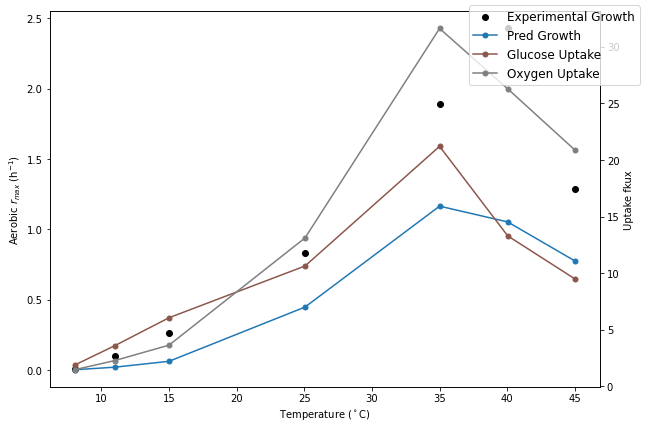

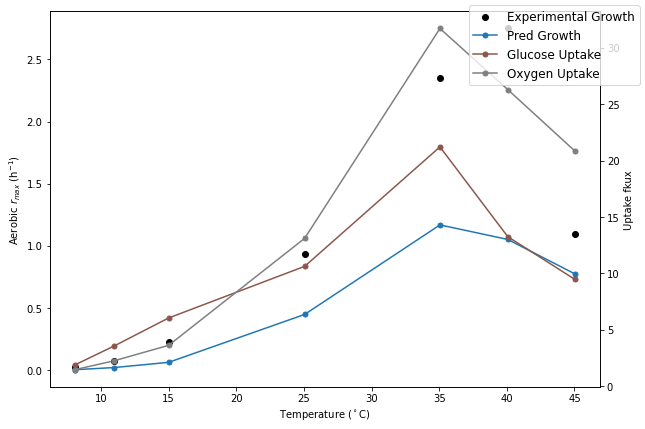

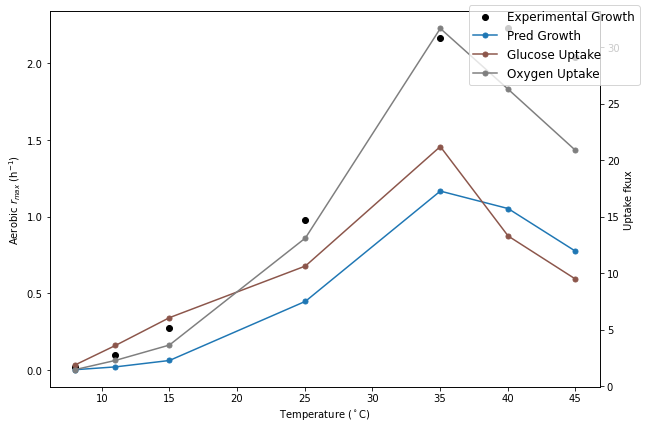

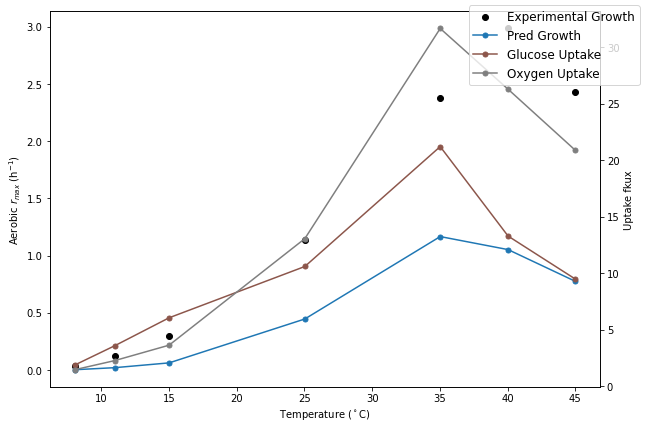

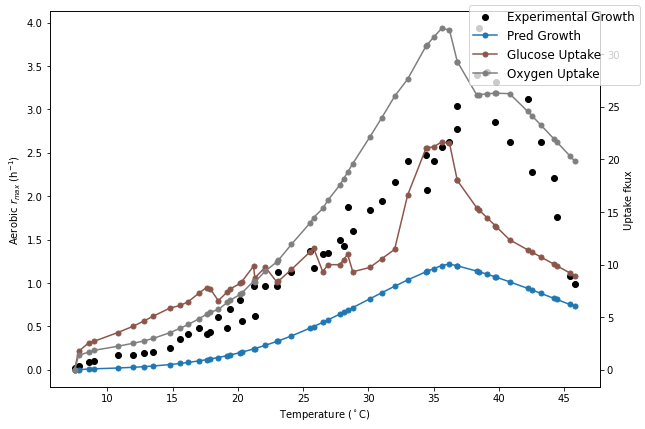

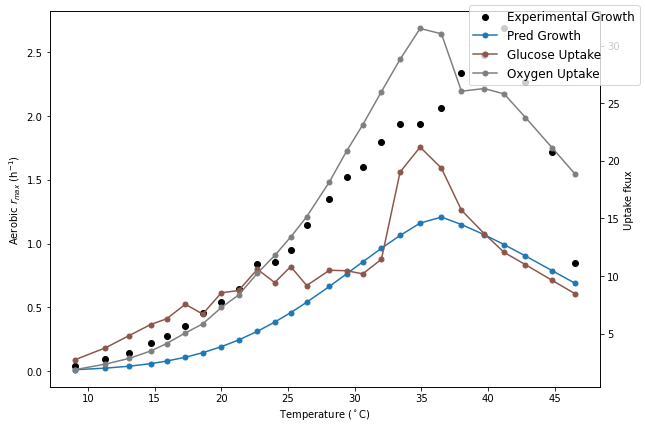

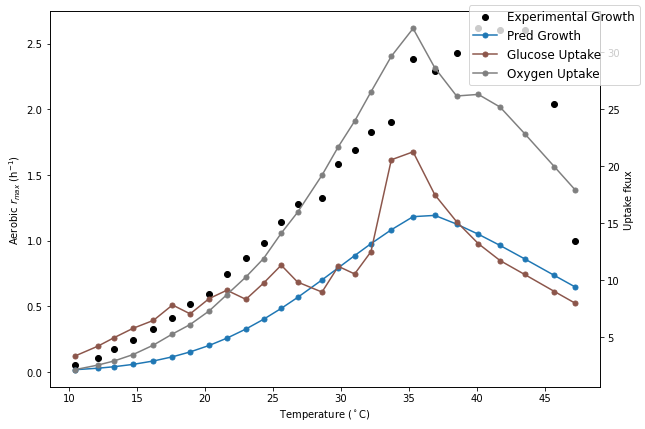

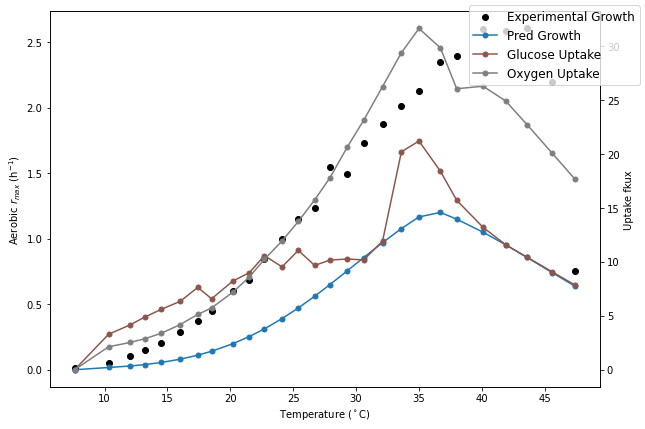

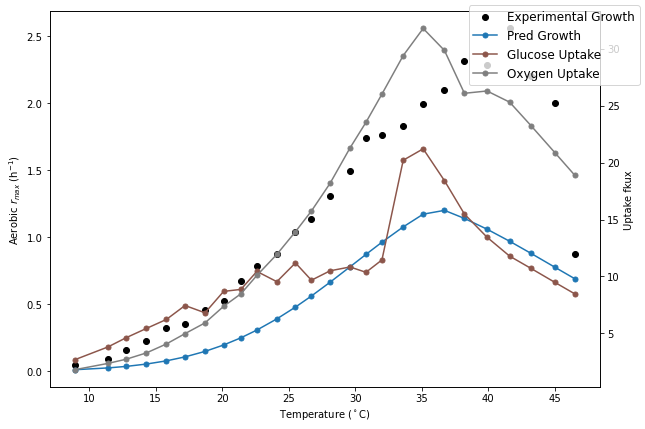

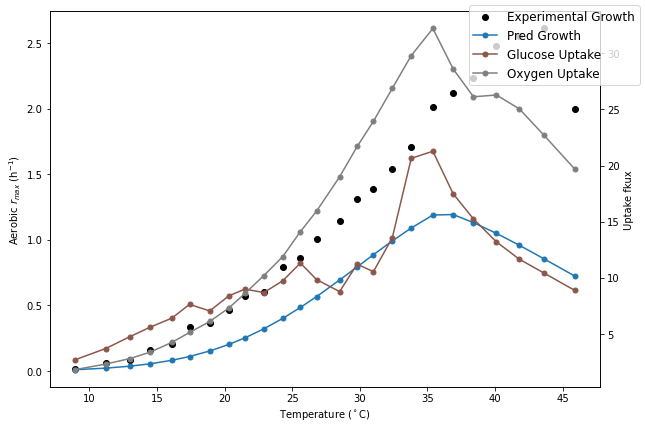

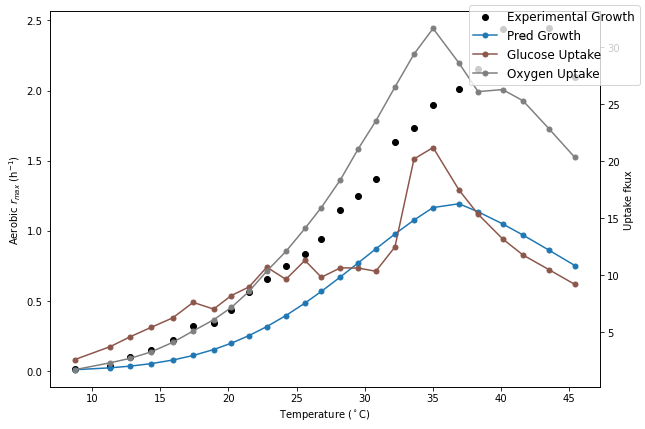

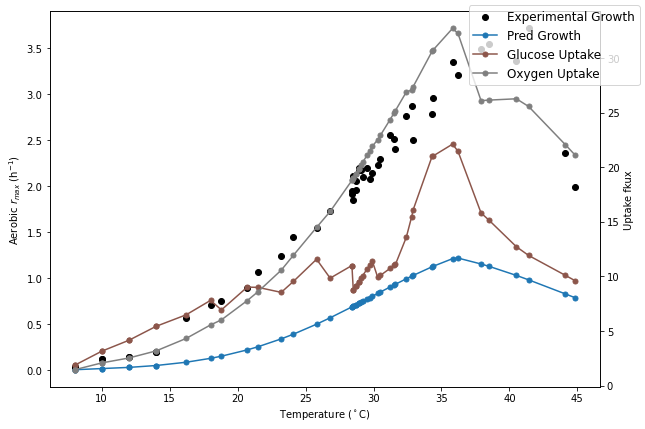

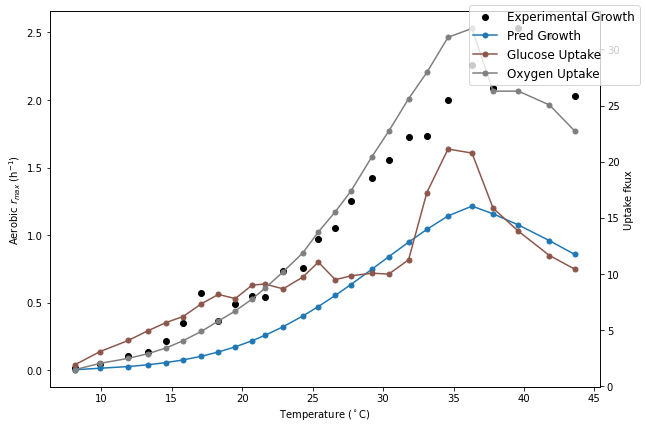

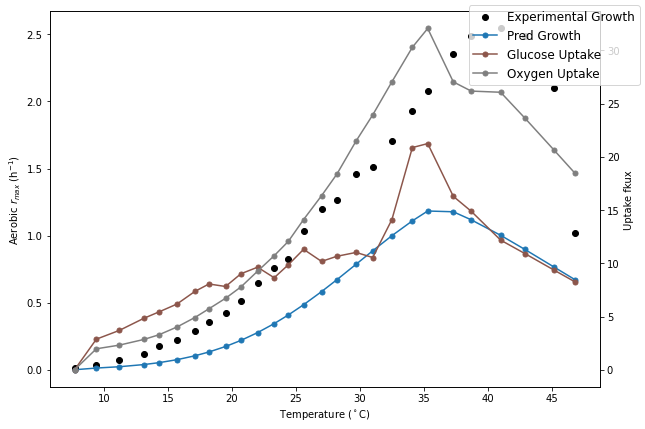

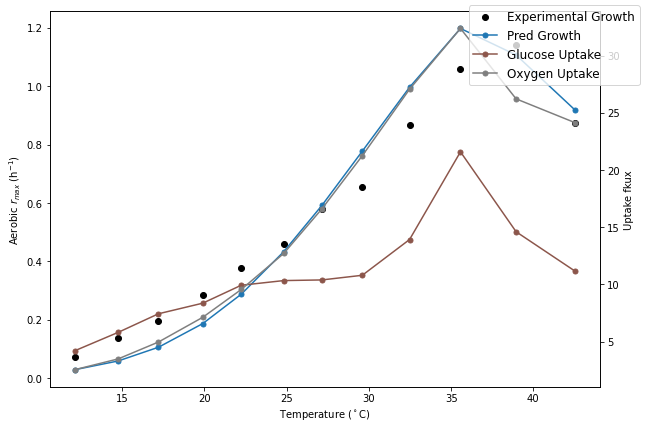

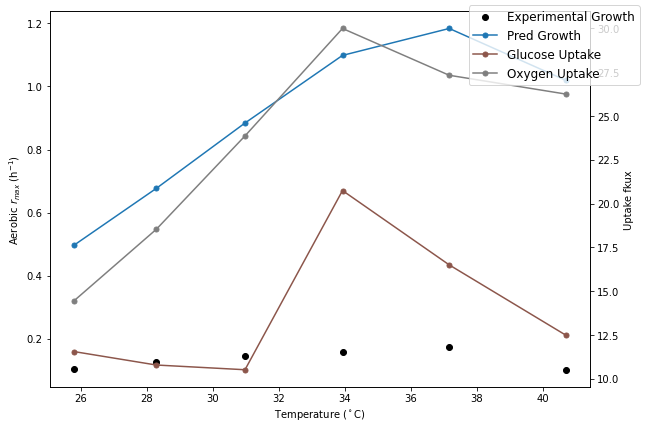

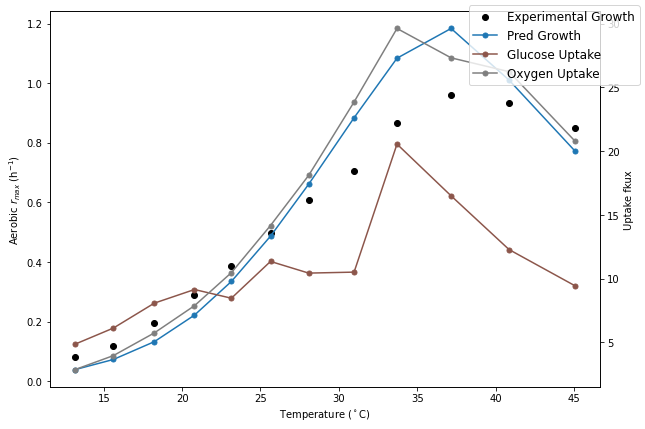

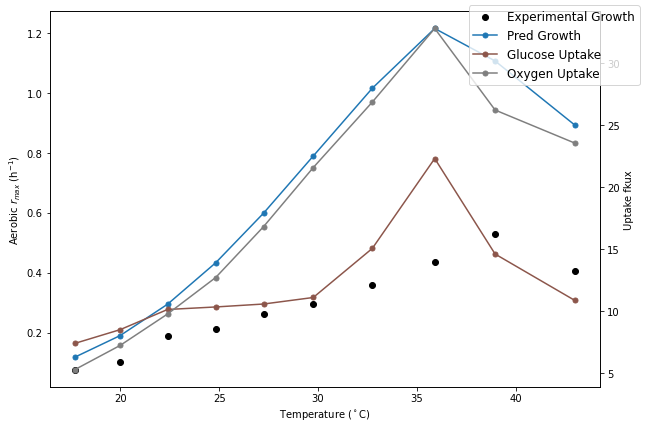

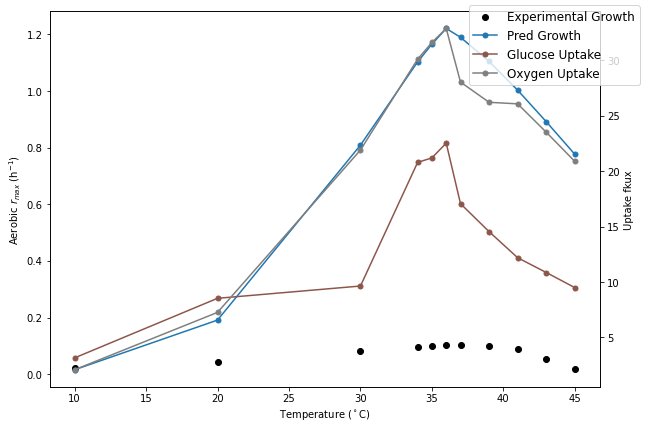

In [6]:
for key in data.keys():
    
    # Extracting the correct data subset
    dfae_batch = data[key].set_index('Ts').rename_axis(None)
    
    # Running the temp dependent model
    rae = aerobic(params)
    
    # Plotting the results
    fig, ax1 = plt.subplots(figsize=(9, 6))
    ax2 = ax1.twinx()

    ax1.scatter(dfae_batch.index,dfae_batch['r'].values,label='Experimental Growth',color='k')
    ax1.plot(dfae_batch.index,rae['growth'],markersize=5,marker='o',label='Pred Growth')

    ax2.plot(dfae_batch.index,rae['glucose'],markersize=5,marker='o',label='Glucose Uptake', color='tab:brown')
    ax2.plot(dfae_batch.index,rae['oxygen'],markersize=5,marker='o',label='Oxygen Uptake', color='tab:gray')

    ax1.set_xlabel("Temperature ($^\circ$C)")
    ax1.set_ylabel("Aerobic $r_{max}$ (h$^{-1}$)")

    ax2.set_ylabel("Uptake fkux")

    fig.legend(fontsize=12)
    fig.tight_layout()
    fig.savefig("../results/LoopSimExtraTopt" + str(key) + ".pdf")